In [1]:
%matplotlib inline
from detail import Detail
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os.path
import os
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annFile='../../json/trainval_parts.json' # annotations
imgDir='../../VOCdevkit/VOC2010/JPEGImages' # jpeg images

In [3]:
# initialize detail api for instance annotations
details = Detail(annFile)

loading annotations into memory...
Done (t=1.87s)
creating index...
index created!


In [4]:
# display detail categories and supercategories
cats = details.getCats()
nms=[cat['name'] for cat in cats]
print ('Categories: \n\n', ' '.join(nms))

nms = set([cat['supercategory'] for cat in cats])
print ('Supercategories: \n', ' '.join(nms))

Categories: 

 train cat aeroplane bottle chair motorbike tvmonitor cow horse bus sofa dog pottedplant bicycle diningtable bird sheep car person boat
Supercategories: 
 object


In [5]:
# get all images containing given categories, select one at random
imgs = details.getImgs(cats=details.getCats('person'));
print("%d images contain people" % len(imgs))

3547 images contain people


In [17]:
# Print image metadata for a random image with a person in it
img = imgs[random.randrange(0,len(imgs))]; 
print(img);

{'categories': [207, 284], 'width': 500, 'height': 375, 'file_name': '2008_003800.jpg', 'date_captured': '31-May-2015 17:45:08', 'annotations': [5049, 5050], 'image_id': 2008003800}


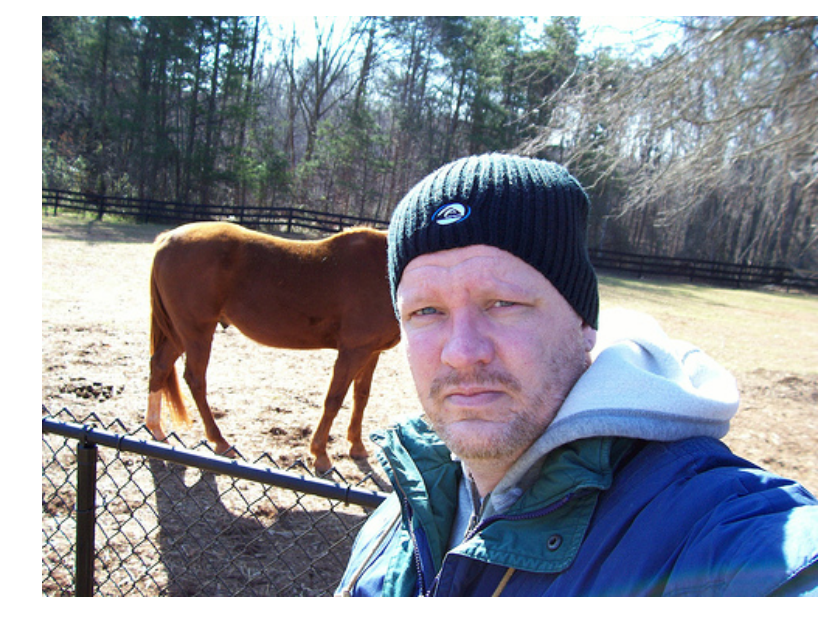

In [18]:
# Read and display image
I = io.imread(os.path.join(imgDir, img['file_name']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

['person', 'horse']


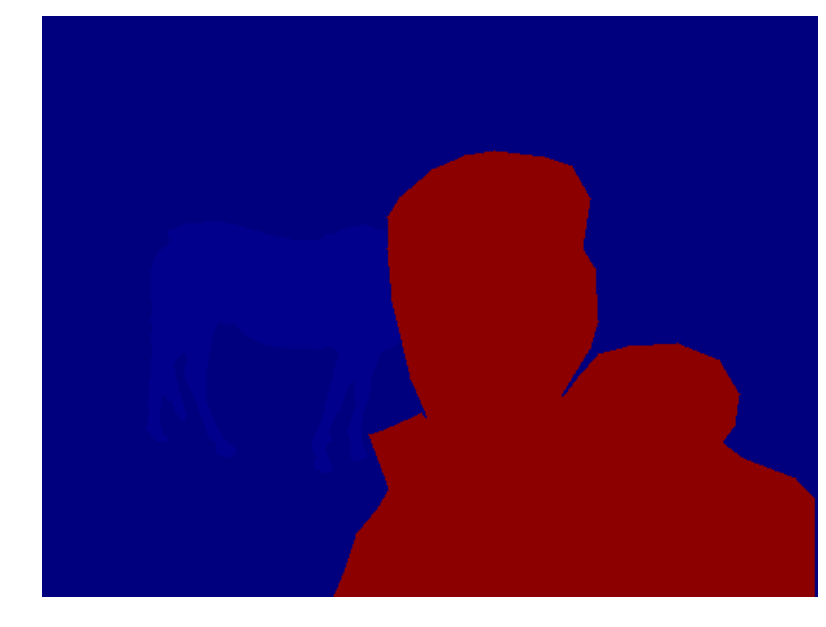

In [19]:
# List categories in the image and display semantic segmentation
print([cat['name'] for cat in details.getCats(imgs=img)])
M = details.getMask(img, show=True)

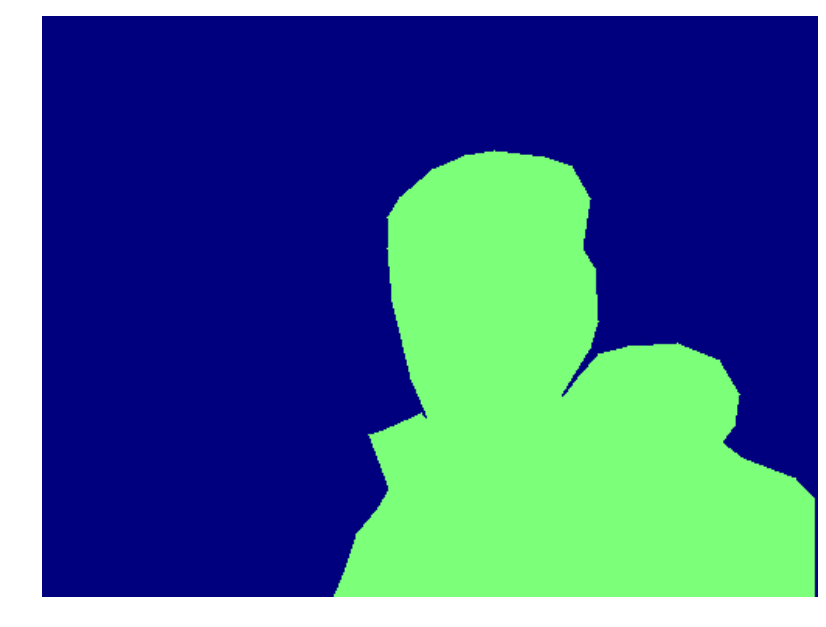

In [20]:
# load and display instance annotations
M = details.getMask(img, cat='person', show=True)

[{'name': 'silh', 'part_id': 100}, {'name': 'head', 'part_id': 110}, {'name': 'lear', 'part_id': 111}, {'name': 'rear', 'part_id': 112}, {'name': 'leye', 'part_id': 113}, {'name': 'reye', 'part_id': 114}, {'name': 'lebrow', 'part_id': 115}, {'name': 'rebrow', 'part_id': 116}, {'name': 'mouth', 'part_id': 117}, {'name': 'hair', 'part_id': 118}, {'name': 'nose', 'part_id': 119}, {'name': 'torso', 'part_id': 120}, {'name': 'neck', 'part_id': 121}, {'name': 'llarm', 'part_id': 131}, {'name': 'luarm', 'part_id': 132}, {'name': 'lhand', 'part_id': 133}, {'name': 'rlarm', 'part_id': 141}, {'name': 'ruarm', 'part_id': 142}, {'name': 'rhand', 'part_id': 143}, {'name': 'llleg', 'part_id': 151}, {'name': 'luleg', 'part_id': 152}, {'name': 'lfoot', 'part_id': 153}, {'name': 'rlleg', 'part_id': 161}, {'name': 'ruleg', 'part_id': 162}, {'name': 'rfoot', 'part_id': 163}]


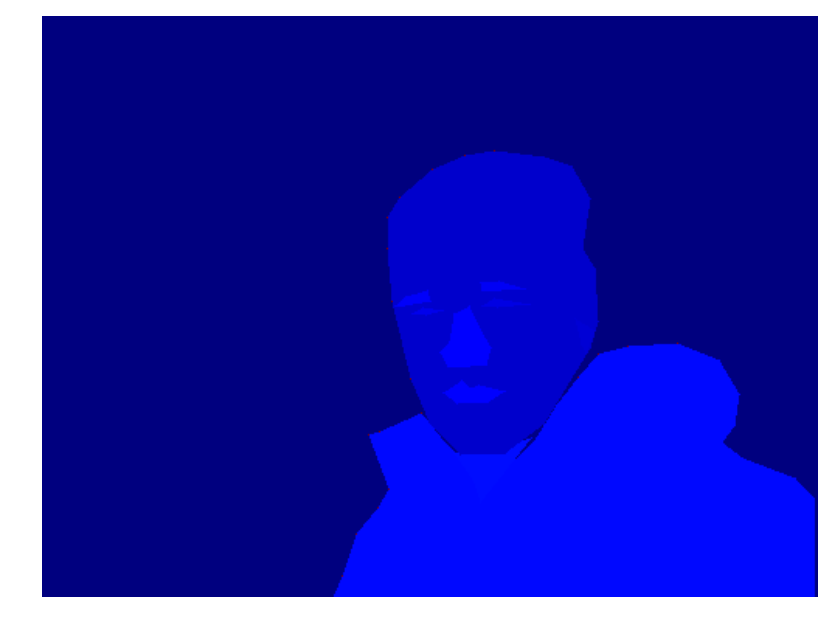

In [21]:
# load and display parts annotations for the first person instance in the image
print(details.getParts('person'))
M = details.getMask(img, cat='person', instance='#0', show=True)

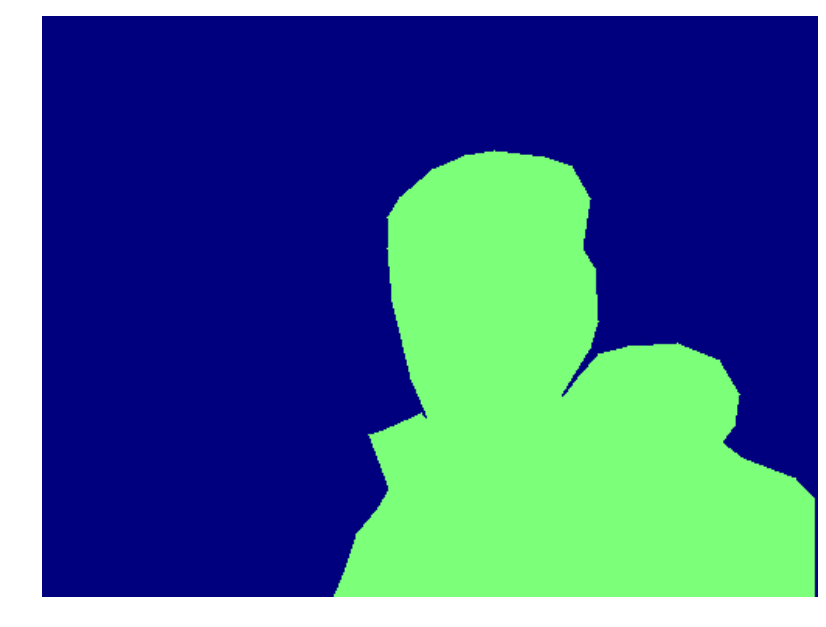

In [22]:
# Convert to a simple binary instance mask
details.showMask(M != 0)

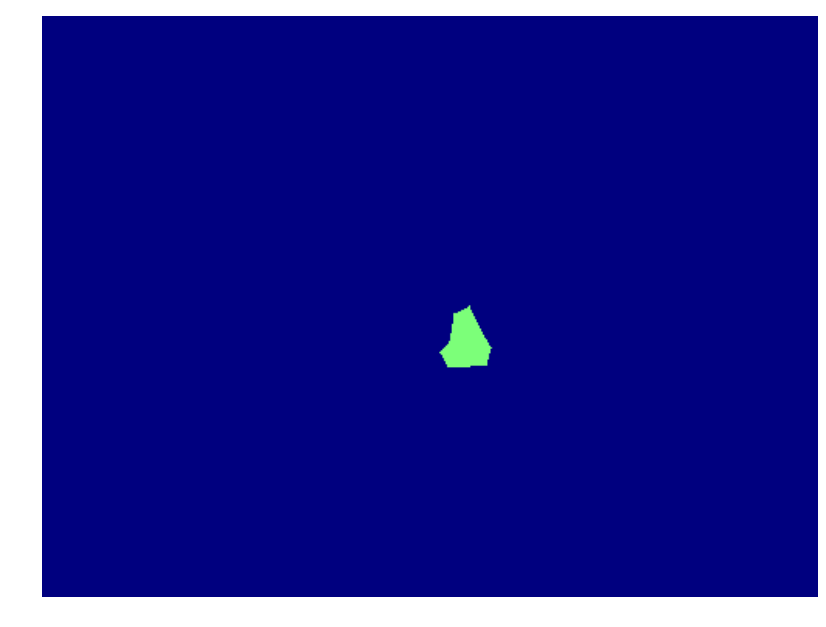

In [23]:
# Print mask for a particular part (in this case 'nose')
M = details.getMask(img, cat='person', instance='#0', part='nose', show=True)

In [24]:
# Get help
help(Detail)

Help on class Detail in module detail:

class Detail(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, annotation_file=None)
 |      Constructor of Detail helper class for reading and visualizing annotations.
 |      :param annotation_file (str): location of annotation file
 |      :param image_folder (str): location to the folder that hosts images.
 |      :return:
 |  
 |  decodeMask(self, rle)
 |      Convert uncompressed RLE to binary mask.
 |      :return: binary mask (numpy 2D array)
 |  
 |  getAnns(self, annIds=[], imgs=[], cats=[], areaRng=[])
 |      Get annotations that satisfy given filter conditions. default is no filter
 |      :param annIds (int array) : get anns with the given IDs
 |             imgs  (image array)     : get anns in the given imgs
 |             cats  (category array)     : get anns for given cats
 |             areaRng (float array)   : get anns for given area range (e.g. [0 inf])
 |      :return: anns  (annotation array)       : array